# Repo Radar | FOSS Analytics

In [1]:
import pandas as pd
import plotly as ply
import plotly.subplots as plys
import plotly.express as px
from datetime import datetime
from library import *

In [2]:
data = pd.read_csv('repo_data_clean.csv', sep=';')
data[['created_at', 'updated_at', 'pushed_at']] = data[['created_at', 'updated_at', 'pushed_at']].map(lambda x: datetime.strptime(x[:10], '%Y-%m-%d').year)
data.iloc[:,-9:-3] = data.iloc[:,-9:-3].map(lambda x: x.split('//') if isinstance(x,str) else x)

## The industry standard

GitHub has become the heart of open-source software (OSS) development, hosting millions of projects that power modern technology. But how has open source evolved on GitHub over the years? Let’s explore the trends, growth, and impact of OSS through data.

### The Rise of Github

GitHub was founded in 2008, and since then, it has grown exponentially:  
- [**2010**](https://github.blog/news-insights/one-million-repositories/): ~1M repositories  
- **2015**: ~20M repositories
- [**2023**](https://octoverse.github.com/2023): **Over 420M repositories** (with ~28M public ones)

## Open-source adoption has skyrocketed

For our analysis we have scrapped the top 1000 open source repositories with the most stars and forks, obviously there is a lot of overlap in these areas and we ended up with a total of 1505 repositories to analyze.

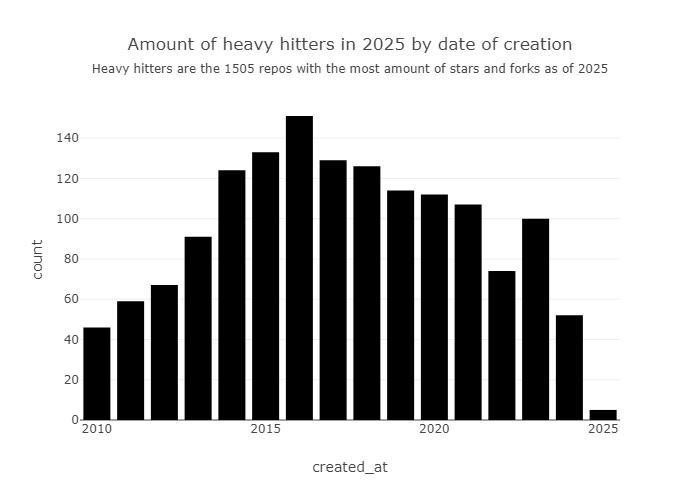

In [11]:
from IPython.display import Image

date_data = data.value_counts('created_at').sort_index().reset_index()
fig = px.bar(date_data[(date_data['created_at'] >= 2010) & (date_data['created_at'] <=2025)],
    x='created_at',
    y='count',
    title='Amount of heavy hitters in 2025 by date of creation',
    subtitle='Heavy hitters are the 1505 repos with the most amount of stars and forks as of 2025'
)
fig.show()
fig.write_image("plot.png")  
Image(filename="plot.png")   

### Notice the bump around 2016?
2016 was a year of many changes for the open source community characterized by:
- The requirement from many schools and universities to use GitHub for student projects in STEM fields.
- A cultural shift in the developer world towards open source software.
- The adoption of open source software from big tech companies like Microsoft, Google, Facebook, IBM. 
  - Companies realized that open-sourcing tools could drive adoption, attract talent, and improve software quality through community contributions.
  - Projects like Kubernetes (Google, 2014) and React (Facebook, 2013) were gaining training on the octocat platform.

This led to an inmense growth in open source project in this year making those repositories stand out in terms of stars and forks which are the metrics we chose to analyze.

### The Battle of Languages. What developers loved ... and what they hated

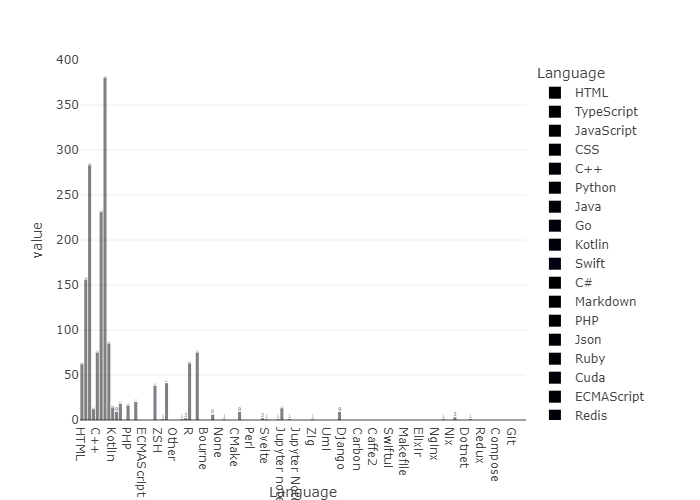

In [18]:
count_langs = lambda column: {key: len(data[data[column].str.contains(key, na = False)]) \
                    for key in all_prog_langs}
all_prog_langs = extract_unique(data['Programming Languages used'].map(parse_to_list))
language_count = count_langs('Programming Languages used')
as_main_language = count_langs('Main Programming Language')

lang_data = data.explode('Programming Languages used').value_counts(['Programming Languages used', 'Main Programming Language']).sort_index().reset_index()
language_count = pd.DataFrame(
                    {'Language':  list(language_count.keys()),
                     'Times Used': list(language_count.values()),
                     'Used %': [num/len(repo_data) for num in language_count.values()],
                     'As Main': list(as_main_language.values()),
                     'As Main %': [num/len(repo_data) for num in as_main_language.values()]
                     }).sort_values('Times Used', ascending=False)
fig = px.bar(
            language_count,
            x='Language',
            y=['Times Used', 'As Main'],
            barmode = 'overlay',
            color='Language',
            text_auto=True,
            hover_name='Language',
            hover_data={
                'Used %': ':.2%', 'As Main %': ':.2%',
                }
        )
fig
fig.write_image("language_stats.png")
Image("language_stats.png")

Why is 2023

## Top 10 repositories for developers in 2025

Github remains the go-to platform for developers to discover, share and collaborate. No matter if you are just beggining your developer journey or an experienced software guru seeking to stay ahead of the curve, these 10 essential GitHub repositories will charge your workflow in 2025.